# Baseline mit einem Spieler


In [1]:
import locale

from helpers import colorboxplot, makeHistogram, getDataFromDB, getSettingsFromDB, colors



# %config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle

locale.setlocale(locale.LC_NUMERIC, "german")

mplstyle.use("fast")
mplstyle.use("default")
# mpl.rcParams['figure.figsize'] = [20, 10]




Pfad aus dem die Datenbanken geladen werden sollen.

In [2]:
db_dir = "D:/Uni/BA/data/"
db_filename = "gameHistories_baseline_two_players"

Lade Daten aus der Datenbank

In [3]:
roundCounts, stepCounts, winners, settingsIDs = getDataFromDB(db_dir, db_filename)
settings = getSettingsFromDB(db_dir,db_filename)

db load finished after 0:00:05.908045
sort finished after 0:00:00.072018
groupby finished after 0:00:00.087019
sort finished after 0:00:00.313071
split finished after 0:00:02.905721
settings loaded


Erstelle Label basierend auf den Einstellungen des jeweiligen Testsets

In [4]:
labels_unordered  = [ " vs ".join([p.getStrategy().getName()+" [{}]".format(p.getStoneCount()) for p in s[1]]) for s in settings]
labels = [labels_unordered[i] for i in settingsIDs]
labels


['random [7] vs random [7]']

## Ein Spielstein

Text(0.5, 1.0, 'Spiellänge in Schritten für einen Stein [1.000.200 Spiele]')

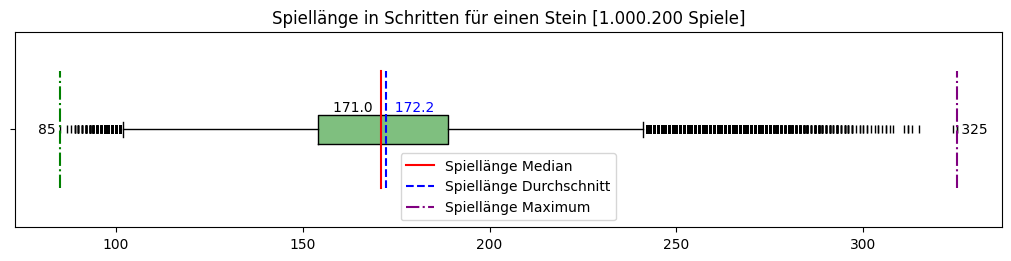

In [5]:
sc = stepCounts[0]
figSingelStoneSteps, ax = plt.subplot_mosaic([["Boxplots Schritte"]], figsize=[
    10, 2.5], layout="constrained")
# colorboxplot([[rc/(i+1) for rc in part]
#              for i, part in enumerate(stepCounts)], ax["Boxplots Schritte"], labels, colors)
colorboxplot([sc], ax["Boxplots Schritte"], [""], colors[0])
ax["Boxplots Schritte"].set_title(
    "Spiellänge in Schritten für einen Stein [{0:n} Spiele]".format(len(sc), grouping=True))


Text(0.5, 1.0, 'Spiellänge in Runden für einen Stein [1.000.200 Spiele]')

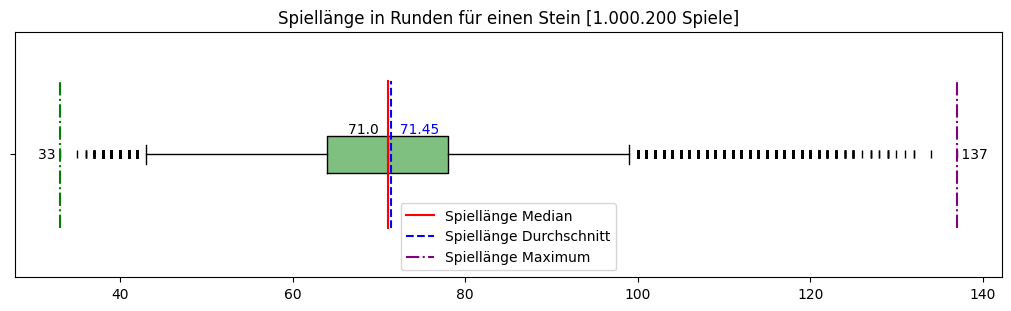

In [6]:
rc = roundCounts[0]
figSingelStoneRounds, ax = plt.subplot_mosaic([["Boxplots Runden"]], figsize=[
    10, 3], layout="constrained")
colorboxplot([rc], ax["Boxplots Runden"], [""], colors[0])
ax["Boxplots Runden"].set_title(
    "Spiellänge in Runden für einen Stein [{0:n} Spiele]".format(len(sc), grouping=True))


## 7 Spielsteine

In [7]:
sc = stepCounts[6]
figSingelStoneSteps, ax = plt.subplot_mosaic([["Boxplots Schritte"]], figsize=[
    10, 2.5], layout="constrained")
# colorboxplot([[rc/(i+1) for rc in part]
#              for i, part in enumerate(stepCounts)], ax["Boxplots Schritte"], labels, colors)
colorboxplot([sc], ax["Boxplots Schritte"], [""], colors[6])
ax["Boxplots Schritte"].set_title(
    "Spiellänge in Schritten für sieben Steine [{0:n} Spiele]".format(len(sc), grouping=True))


IndexError: list index out of range

ValueError: Invalid RGBA argument: 'l'

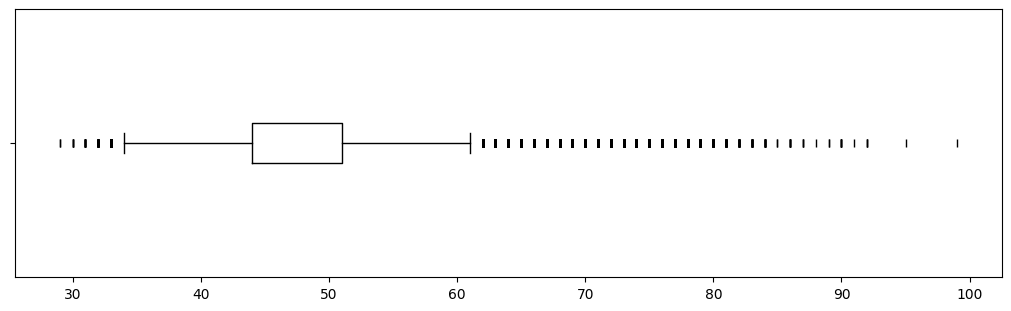

In [ ]:
rc = roundCounts[6]
figSingelStoneRounds, ax = plt.subplot_mosaic([["Boxplots Runden"]], figsize=[
    10, 3], layout="constrained")
colorboxplot([rc], ax["Boxplots Runden"], [""], colors[6])
ax["Boxplots Runden"].set_title(
    "Spiellänge in Runden für sieben Steine [{0:n} Spiele]".format(len(sc), grouping=True))


## Alle Spielsteine 

In [ ]:
figSingelStoneSteps, ax = plt.subplot_mosaic([["Boxplots Schritte"]], figsize=[
    10, 2.5], layout="constrained")
colorboxplot(stepCounts, ax["Boxplots Schritte"], labels, colors)
ax["Boxplots Schritte"].set_title(
    "Spiellänge in Schritten [{0:n} Spiele]".format(len(stepCounts), grouping=True))


In [ ]:
figSingelStoneSteps.savefig(
    "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline1s1pSchritte.png", dpi=300,)
figSingelStoneRounds.savefig(
    "../../tex/game_ur_ba_thesis/img/Grafiken/Baseline1s1pRunden.png", dpi=300,)
